In [1]:
#@title Setup
%%capture
!pip install pixell
!git clone https://github.com/louisbranch/cmb_workshop.git

import numpy as np
import matplotlib.pyplot as plt

from cmb_workshop.cmb import cmb_utils, layout, plot, tester, widgets, const
from cmb_workshop.cmb.i18n import I18N
from cmb_workshop.cmb.widgets import cmb_data

i18n = I18N(base_path='cmb_workshop/content', images_url='https://raw.githubusercontent.com/louisbranch/cmb_workshop/main/media')

layout.set_custom_layout(figsize=(16,6))

from IPython.core.magic import register_cell_magic

@register_cell_magic
def skip_on_error(line, cell):
    try:
        exec(cell)
    except Exception as e:
        print(f"Error: {e}")

In [2]:
#@title
i18n.display_markdown('workshop_overview')

<IPython.core.display.Javascript object>

# Cosmic Microwave Background (CMB) Workshop

Authors: Louis Branch and Yilun Guan

## Activity Overview

In this workshop, you will learn about the Cosmic Microwave Background (CMB) and its significance in cosmology. You'll start by understanding some basic physics concepts, like blackbody radiation and Wien's Law. Then, you'll explore how scientists study the CMB using real data from space missions. You'll also get hands-on experience with Python programming to analyze and visualize this data.

By the end of this workshop, you'll have a better understanding of the early universe and the tools scientists use to study it. Let's get started!

### Learning Goals

By the end of this notebook, you should be able to:

1. **Basics of the Cosmic Microwave Background (CMB):**
   - Describe what the CMB is and why it’s important.
   - Explain how the CMB was formed.

2. **Blackbody Radiation:**
   - Define blackbody radiation.
   - Use Planck's Law to calculate radiation.
   - Explain Wien's Law and its relation to temperature.

3. **Astronomical Data Analysis:**
   - Create and interpret blackbody radiation graphs.
   - Analyze data from the COBE satellite.

4. **Doppler Effect and Universe Expansion:**
   - Explain the Doppler effect.
   - Understand redshift and its evidence for the expanding universe.

5. **Working with Real CMB Data:**
   - Load and visualize CMB maps.
   - Compute and understand temperature fluctuations in the CMB.
   - Identify features in CMB maps.

6. **Python Programming Skills (Optional Challenge):**
   - Write Python functions for physics equations.
   - Use Python for data visualization and analysis.

In [3]:
#@title
i18n.display_markdown('workshop_intro')

<IPython.core.display.Javascript object>

## Introduction

### The Cosmic Microwave Background (CMB)

The Cosmic Microwave Background (CMB) is the afterglow of the Big Bang, the event that created our universe around 13.8 billion years ago. This faint glow fills the entire sky and is one of the most important pieces of evidence for the Big Bang theory.

#### What is the CMB?

The CMB is a form of electromagnetic radiation (EM radiation), similar to visible light but in the microwave part of the spectrum. EM radiation encompasses all forms of light, from radio waves to gamma rays, differing in wavelength and frequency. Here's a simplified explanation:

- **Wavelength and Frequency:** EM radiation behaves like waves. Wavelength is the distance between wave crests, while frequency measures how often these waves pass a given point.

- **The Electromagnetic Spectrum:** This spectrum spans from long-wavelength radio waves to short-wavelength gamma rays, with visible light occupying a small segment in the middle.

<figure>
<img src="https://raw.githubusercontent.com/louisbranch/cmb_workshop/main/media/em_spectrum.png" height="400"/>
<figcaption>Electromagnetic spectrum showing various types of radiation, including microwaves where the CMB is found. Adapted from <a href="https://commons.wikimedia.org/wiki/File:Electromagnetic-Spectrum.png">Wikimedia Commons</a>.</figcaption>
</figure>

#### Formation of the CMB

In the early universe, everything was so hot that atoms couldn't form; protons and electrons were separate particles. As the universe expanded and cooled, these particles combined to form neutral hydrogen atoms. This process, called recombination, allowed light to travel freely through space for the first time, creating the CMB.

#### Discovery of the CMB

The CMB was discovered accidentally in 1964 by two radio astronomers, Arno Penzias and Robert Wilson. They were working on a radio telescope and found a mysterious noise that came from all directions in the sky. This noise turned out to be the CMB, confirming predictions made by earlier scientists and providing strong evidence for the Big Bang theory. The CMB is essentially a snapshot of the early universe, capturing its conditions and evolution over time.

<figure>
<img src="https://raw.githubusercontent.com/louisbranch/cmb_workshop/main/media/horn.jpg" height="400"/>
<figcaption>This is the Bell Labs' horn antenna. This is the radio telescope that first measured the CMB. This photo is from April 2007. <a href="https://commons.wikimedia.org/wiki/File:Bell_Labs_Horn_Antenna_Crawford_Hill_NJ.jpg">Source.</a></figcaption>
</figure>

In [4]:
# @title
i18n.display_markdown('blackbody_intro')

<IPython.core.display.Javascript object>

## Understanding Cosmic Light

### Blackbody Radiation

Blackbody radiation describes the light emitted by an object that absorbs all light falling on it. This ideal object, called a "black body," emits light across all wavelengths. The amount of light emitted depends only on its temperature. This concept helps us understand stars and the Cosmic Microwave Background (CMB).

Planck's Law describes how much light a blackbody emits at different wavelengths. The formula is:

$B(\lambda, T) = \frac{2hc^2}{\lambda^5} \frac{1}{\exp\left(\frac{hc}{\lambda kT}\right) - 1}$

where:

* $B(\lambda, T)$ is the spectral radiance, measured in $W/m^{3}$,
* $h$ is the Planck constant ($6.626 \times 10^{-34}$ J s),
* $c$ is the speed of light in a vacuum ($3.00 \times 10^8$ m/s),
* $k$ is the Boltzmann constant ($1.381 \times 10^{-23}$ J/K),
* $T$ is the absolute temperature of the blackbody in Kelvin (K),
* $\lambda$ is the wavelength in meters (m).

**Understanding Exponential Functions:**

An exponential function, like $\exp(x)$, represents rapid growth where the value of the function increases exponentially as xx increases. In Planck's Law, the exponential term adjusts the amount of light emitted at different wavelengths based on temperature.


### Coding Challenge: Write your own implementation of Planck's Law:

Try implementing Planck's Law in Python to see how much light is emitted at different wavelengths and temperatures.

In [5]:
def blackbody_radiation(wavelength, temp):
    """
    Your implementation of the blackbody radiation law equation using wavelength in meters.

    Parameters:
    - wavelength: Wavelength of the radiation (in meters).
    - temp: Temperature of the blackbody (in Kelvin).

    Returns:
    - Spectral radiance of the blackbody (in W/m^2/sr/nm). Return None by default as a placeholder.
    """
    # Reminder of the Planck's law formula in SI units:
    # B(lambda, T) = (2hc^2 / lambda^5) * 1 / (exp(hc / (lambda kT)) - 1)
    # where h = 6.626e-34 (J·s), c = 3e8 (m/s), k = 1.381e-23 (J/K),
    # lambda is in meters, and T is in Kelvin.

    # Hint: In Python, use '**' to denote exponentiation. For example, c squared is written as c**2.
    # NumPy's exp function (np.exp) is used for exponential calculations. For e^x, you write np.exp(x).

    h = 6.62607015e-34  # Planck constant, J·s
    c = 299792458       # Speed of light, m/s
    k = 1.380649e-23    # Boltzmann constant, J/K

    exponent_factor = np.exp(h * c / (wavelength * k * temp))
    spectral_radiance = (2 * h * c**2) / (wavelength**5 * (exponent_factor - 1))
    return spectral_radiance

In [6]:
# Test your implementation of the Planck's Law
print(tester.test_blackbody_radiation(blackbody_radiation))

All tests passed! Your implementation appears to be correct.


In [7]:
#@title

i18n.display_markdown('blackbody_visualizing')
widgets.blackbody_radiation(blackbody_radiation)
i18n.display_markdown('blackbody_coding')

<IPython.core.display.Javascript object>

#### Visualizing the Blackbody Radiation

interactive(children=(FloatSlider(value=5778.0, description='Temperature (K):', layout=Layout(width='45%'), ma…

Output()

<IPython.core.display.Javascript object>

### Coding Challenge: Blackbody Radiation Plot

**Instructions:**

1. Define Wavelengths: Use `np.linspace(start, end, num)` to create an array of wavelengths (in meters).
2. Select Temperatures: Choose temperatures (in Kelvin) for different objects or scenarios you want to explore (e.g., Sun, Sirius A, etc).
3. Calculate Spectral Radiance: Implement the blackbody_radiation function using Planck's Law to compute spectral radiance values for each temperature and wavelength range.
4. Plot Your Results: Write Python code to plot the spectral radiance curves for the chosen temperatures. Remember to label your axes appropriately and include a legend to differentiate between temperatures.

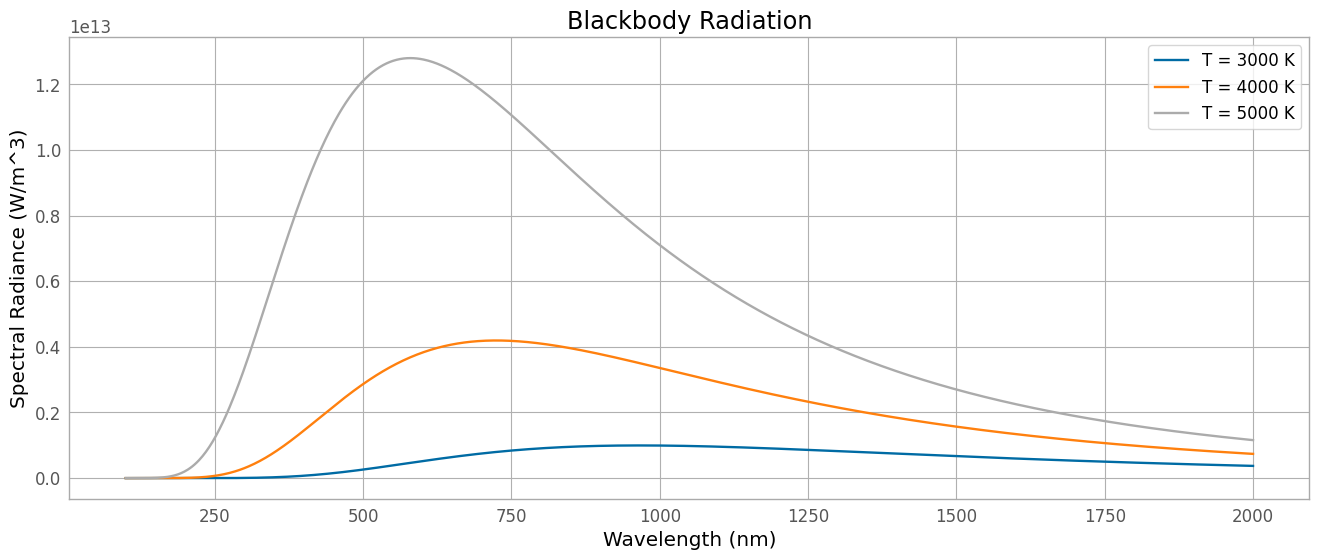

In [8]:
%%skip_on_error

wavelengths = np.linspace(100, 2000, 1000) * 1e-9
temperatures = [3000, 4000, 5000]

for temp in temperatures:
    radiance = blackbody_radiation(wavelengths, temp)
    plt.plot(wavelengths * 1e9, radiance, label=f'T = {temp} K')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Spectral Radiance (W/m^3)')
plt.title('Blackbody Radiation')
plt.legend()
plt.show()

In [9]:
#@title
i18n.display_markdown('blackbody_reflection')

<IPython.core.display.Javascript object>

##### Think and Reflect:
1. What changes do you notice in the curve when the temperature is increased? 
2. How about when it is decreased?

In [10]:
#@title
i18n.display_markdown('wiens_law')

<IPython.core.display.Javascript object>

### Peak Wavelength and Wien's Law

After exploring the blackbody radiation curves, you've seen how the peak of the radiation curve shifts with changes in temperature. This movement isn't random; it's described by Wien's Displacement Law. Wien's Law tells us the wavelength at which the radiation from a blackbody (like a star, including our Sun) is most intense. This wavelength is inversely related to the temperature of the body, meaning that as the temperature increases, the peak wavelength decreases.

Wien's Law can be stated mathematically as:

$\lambda_{\text{max}} = \frac{b}{T}$

where:
- $\lambda_{\text{max}}$ is the peak wavelength (in meters, m) — the wavelength at which the emission is strongest,
- $T$ is the absolute temperature of the blackbody (in Kelvin),
- $b$ is Wien's displacement constant, approximately $2.897 \times 10^{-3}$ m·K (meter-Kelvin).

This law reveals an important insight: as a blackbody gets hotter, its peak emission shifts to shorter wavelengths. For example, a heating metal glows red and then white as its temperature increases, meaning it emits light at shorter and shorter wavelengths.

#### Practical Implication

In astronomy, Wien's Law enables us to determine the surface temperature of stars by observing the colour of the light they emit. The colour of a star is directly related to its wavelength. A star emitting peak radiation at shorter wavelengths (more towards the blue end of the spectrum) is hotter than a star emitting peak radiation at longer wavelengths (more towards the red end of the spectrum). For reference, visible light wavelengths range from about 400 nm (nanometers) for violet light to 700 nm for red light, where 1 nm = $1 \times 10^{-9}$ meters.

### Coding Challenge: Implementing Wien's Law

Let’s implement Wien's Law to calculate the peak wavelength for a given temperature.

In [11]:
def peak_wavelength(temp):
    """
    Your implementation of Wien's Law to calculate the peak wavelength.

    Parameters:
    - temp: The absolute temperature of the blackbody (in Kelvin).

    Returns:
    - The peak wavelength (in meters). Return None by default as a placeholder.
    """
    b = 2.897e-3  # Wien's displacement constant, m·K

    # TODO: Your implementation here.
    # Remember to return your calculated peak wavelength instead of None.

    lambda_max = b / temp
    return lambda_max

In [12]:
# Test your implementation of the Wien's Law
print(tester.test_peak_wavelength(peak_wavelength))

All tests passed! Your implementation appears to be correct.


In [13]:
#@title
i18n.display_markdown('wiens_law_visualizing')
widgets.peak_wavelength(blackbody_radiation, peak_wavelength)
i18n.display_markdown('wiens_law_coding')

<IPython.core.display.Javascript object>

#### Visualizing the Peak Wavelength

interactive(children=(FloatSlider(value=5778.0, description='Temperature (K):', layout=Layout(width='45%'), ma…

<IPython.core.display.Javascript object>

### Coding Challenge: Plotting Blackbody Radiation and Annotating Peak Wavelengths

Now, let's plot the blackbody radiation curves for different temperatures using the Planck's Law function you previously implemented. Additionally, you will annotate the peak wavelength calculated using Wien's Law on the plot.

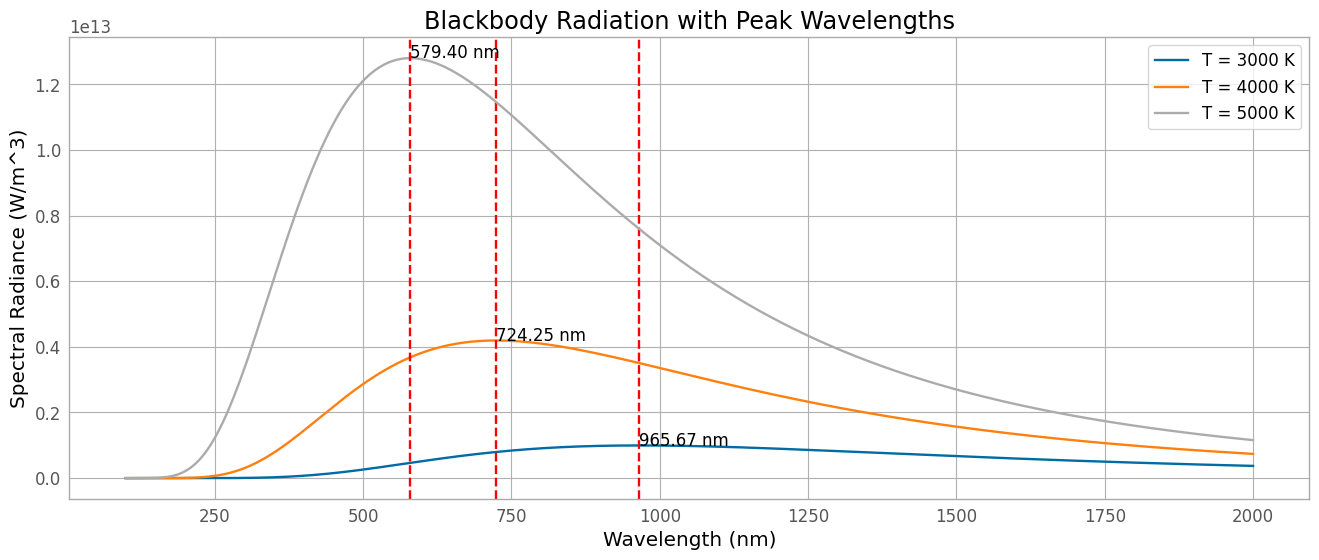

In [14]:
wavelengths = np.linspace(100, 2000, 1000) * 1e-9
temperatures = [3000, 4000, 5000]

for temp in temperatures:
    radiance = blackbody_radiation(wavelengths, temp)
    lambda_max = peak_wavelength(temp)
    lambda_max_nm = lambda_max * 1e9
    plt.plot(wavelengths * 1e9, radiance, label=f'T = {temp} K')
    plt.axvline(lambda_max_nm, color='r', linestyle='--')
    plt.text(lambda_max_nm, max(radiance), f'{lambda_max_nm:.2f} nm')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Spectral Radiance (W/m^3)')
plt.title('Blackbody Radiation with Peak Wavelengths')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

#### The Visible Light Spectrum

The visible light spectrum is the range of electromagnetic waves that can be detected by the human eye. It includes all the colours we see in a rainbow, from violet to red. Each colour corresponds to a specific range of wavelengths.

Let's zoom in on the blackbody radiation spectrum to see how the different colours fit within the electromagnetic spectrum. This will help us understand the relationship between temperature and the colour of light emitted by objects.

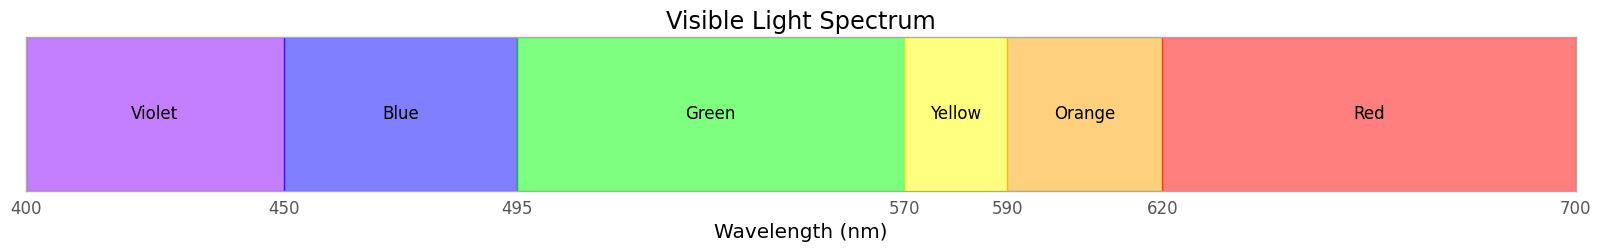

<IPython.core.display.Javascript object>

##### Think and Reflect:
1. What happens to the peak wavelength when the temperature is decreased? How might this affect the appearance of a star as it cools down?
2. Can you think of everyday examples where changes in temperature lead to changes in colour similar to those described by Wien's Law?

In [15]:
#@title
i18n.display_markdown('visible_spectrum')
plot.visibile_wavelengths()
i18n.display_markdown('visible_spectrum_reflection')

In [16]:
#@title
i18n.display_markdown('universe_expansion')
widgets.redshift()
i18n.display_markdown('universe_expansion_reflection')

<IPython.core.display.Javascript object>

## Expansion of the Universe

### The Doppler Effect

The Doppler effect is a phenomenon that occurs when there is relative motion between a source of waves and an observer. You may have noticed it with sound: for example, the siren of an ambulance sounds higher-pitched as it approaches you and lower-pitched as it moves away. This change in pitch happens because the sound waves are compressed as the ambulance approaches and stretched as it moves away.

<figure>
<img src="https://raw.githubusercontent.com/louisbranch/cmb_workshop/main/media/doppler_effect.png" />
<figcaption>The figure shows a moving ambulence, its moving to the right. The sound waves from the siren are compressed in the direction of travel, and streched in the direction the ambulence is leaving. <a href="https://online-learning-college.com/knowledge-hub/gcses/gcse-physics-help/doppler-effect/">Source.</a></figcaption>
</figure>

### Redshift and the Expanding Universe

The Doppler effect also applies to light waves. When a light source moves away from us, its light waves are stretched, making the light appear redder. This is called redshift. Conversely, if a light source moves toward us, its light waves are compressed, making the light appear bluer, which is called blueshift.

Redshift is a key piece of evidence for the expanding universe. By observing the redshift of light from distant galaxies, scientists have concluded that the universe is expanding. The further away a galaxy is, the faster it appears to be moving away from us, indicating that space itself is stretching.

<figure>
<img src="https://raw.githubusercontent.com/louisbranch/cmb_workshop/main/media/receding.gif" />
<figcaption>The above figure shows how the light from two galaxys moving away from eachother appears redshifted. This is the radio telescope that first measured the CMB. This photo is from April 2007. <a href="https://www.astro.ucla.edu/~wright/cosmo_01.htm">Source.</a></figcaption>
</figure>


##### Visualizing Redshift

Let's look at how redshift works with an interactive plot.


<IPython.core.display.Javascript object>

#### Think and Reflect

1. How does the redshift of light help us understand the movement of galaxies?
2. Why is redshift important evidence for the expanding universe?

In [17]:
#@title
i18n.display_markdown('cobe_data')
widgets.cobe_fit(blackbody_radiation, reference='Superconductor', temperature=2.75)
i18n.display_markdown('cobe_reflection')

<IPython.core.display.Javascript object>

## Analyzing COBE Data Spectrum

The Cosmic Background Explorer (COBE) was a satellite launched by NASA in 1989 to measure the diffuse infrared and microwave radiation from the early universe. One of its key discoveries was the detailed measurement of the Cosmic Microwave Background (CMB) radiation, which closely matches the spectrum of a perfect blackbody.

In this activity, you'll use real data from the COBE mission. By adjusting the temperature of a blackbody radiation curve, you can see how well it fits the actual measurements. The goal is to find the temperature that best matches the COBE data points.

### Interactive Analysis with COBE Data

Let's visualize the COBE data points and fit a blackbody radiation curve to them by adjusting the temperature.

SelectionSlider(continuous_update=False, description='Temperature Reference (from hot to cold):', index=4, lay…

FloatSlider(value=2.75, continuous_update=False, description='Temperature (K):', layout=Layout(width='45%'), m…

Output()

<IPython.core.display.Javascript object>

#### Think and Reflect

1. What temperature value gives the best fit to the COBE data points?
2. Why is the temperature that fits the COBE data so important in cosmology?

In [18]:
#@title
i18n.display_markdown('cmb_maps')
widgets.cmb_planck_map()
i18n.display_markdown('cmb_maps_analysis')

Output hidden; open in https://colab.research.google.com to view.

In [19]:
#@title
i18n.display_markdown('std_dev')
widgets.cmb_std_dev()
i18n.display_markdown('std_dev_coding')

<IPython.core.display.Javascript object>

### Measuring Standard Deviation

Standard deviation is a statistical measure that quantifies the amount of variation or dispersion in a set of values. In the context of the CMB, it helps us understand how much the temperature fluctuates across different parts of the sky. A lower standard deviation means the values are closer to the mean (average), while a higher standard deviation means the values are more spread out.

To measure the standard deviation visually, we look for the range within which most data points fall. This range is typically centered around the mean value, with the standard deviation $\sigma$ indicating the typical distance from the mean.

interactive(children=(Checkbox(value=False, description='Show Guidelines', indent=False), Output()), _dom_clas…

<IPython.core.display.Javascript object>

#### Exercise: Calculate Standard Deviation Numerically

You have already interacted with the widget to find the values for 1 to 3 sigma visually. Now, let's complement this by calculating the standard deviation numerically using `np.std`.

In [20]:
%%skip_on_error

# Variable containing the CMB temperature fluctuation data in micro Kelvin.
cmb_map = cmb_data.map * 1e6

mean_temperature = np.mean(cmb_map)

std_deviation = np.std(cmb_map)

one_sigma = mean_temperature + std_deviation
two_sigma = mean_temperature + 2 * std_deviation
three_sigma = mean_temperature + 3 * std_deviation

print(f"Mean temperature fluctuation: {mean_temperature:.2f} μK")
print(f"Standard deviation: {std_deviation:.2f} μK")
print(f"1 sigma: {one_sigma:.2f} μK")
print(f"2 sigma: {two_sigma:.2f} μK")
print(f"3 sigma: {three_sigma:.2f} μK")

Mean temperature fluctuation: -2.49 μK
Standard deviation: 100.94 μK
1 sigma: 98.46 μK
2 sigma: 199.40 μK
3 sigma: 300.35 μK


In [21]:
#@title
i18n.display_markdown('std_dev_reflection')

<IPython.core.display.Javascript object>

#### Think and Reflect

1. How small are the fluctuations compared to the average CMB temperature of 2.7 K?
2. How many times smaller are the fluctuations than the mean CMB temperature?
3. Why are these temperature fluctuations interesting?

The CMB map is remarkably uniform, meaning that its temperature is almost the same in every direction we look. However, there are tiny fluctuations in this temperature, roughly a hundred-thousand times smaller than the mean temperature. Measuring these tiny fluctuations is a significant achievement, as they represent minute density variations in the early universe, which are the seeds of the structures we see today.

In [22]:
#@title
i18n.display_markdown('cmb_map')
widgets.cmb_map_iframe()

<IPython.core.display.Javascript object>

### What's on the Map

To enhance our understanding and visual exploration of the CMB map, we will utilize an interactive tool. This tool allows us to identify different types of objects present in the CMB map.

In [23]:
#@title
i18n.display_markdown('cmb_map_features')
widgets.cmb_map_objects(path='cmb_workshop/media', answers=True)

<IPython.core.display.Javascript object>

Overall, we can observe several types of features within the CMB map:

1. **Hot Spots/Cold Spots**:
   These regions show variations in temperature due to small differences in the amount of matter in different areas of the early universe. These tiny variations eventually grew over billions of years into the galaxies and other structures we see today.

2. **Stars**:
   While observing the CMB map, you may notice small point-like features that resemble stars. These are stars within our galaxy that become visible by blocking the CMB light.

3. **Galaxies**:
   The CMB map also contains signals from distant galaxies, typically observed as extended patches or structures embedded within the map.

4. **Galaxy Clusters**:
   Galaxy clusters are large assemblies of galaxies and dark matter pulled together by gravitational force. They appear as distinctive cold dot-like spots on the CMB map due to the Sunyaev-Zel'dovich effect. As the CMB radiation passes through the hot gas in galaxy clusters, it gets an energetic kick, shifting the radiation to a slightly different frequency, making these photons "missing" from the CMB map.

5. **Milky Way Galaxy**:
   The Milky Way emits various forms of radiation that can contaminate the CMB signal. It appears as a prominent feature, sometimes referred to as the "Galactic Plane," spanning across the CMB map. It's essential to account for and mitigate the Milky Way's contributions when studying the CMB.

### Formation of Hot and Cold Spots in the CMB

The hot and cold spots in the CMB map formed because of a tug-of-war between two forces in the early universe: the push of light (radiation pressure) and the pull of gravity. 

Here’s a simpler explanation:

1. **Tiny Differences**:
   At the very beginning, there were tiny differences in how matter was spread out in the universe. Some areas had a bit more matter, while others had a bit less.

2. **Push and Pull**:
   Light (radiation pressure) pushed outwards, while gravity pulled matter together. This push and pull created waves, like sound waves moving through the air.

3. **Frozen Waves**:
   About 400,000 years after the Big Bang, the universe cooled down enough that these waves stopped moving. The size of these "frozen" waves is about 500 million light-years across.

These frozen waves are what we see today as the hot and cold spots in the CMB map.

### Identify Different Types of Objects in the Map

Use the grid of images below to identify different types of objects in regions of the CMB map. Each image shows a part of the CMB map. Select the type of object you think is shown in each image from the dropdown list.

In [24]:
#@title
i18n.display_markdown('moon_distance')

<IPython.core.display.Javascript object>

### Estimate the Distance of the Moon

To estimate the age of the universe using the CMB map, we can employ a methodology similar to determining the distance of the moon. Let's walk through how to do that now.

Imagine we already know the physical size (diameter) of the moon is 3,474 km. We can easily measure the angular size (how big the moon looks in the sky) to be 0.52 degrees. 

#### What is Angular Size?

Angular size is how large an object appears to be from a particular point of view. It's like holding a coin at arm's length and seeing how big it looks compared to when you hold it closer to your face.

#### Understanding Arc Length

Arc length is the distance along the curved path of a circle. Think of it like the length of a piece of string wrapped around part of a circle.

#### Estimating the Distance

To estimate the distance to the moon, we use the formula for arc length:

$$\text{distance to the moon} = \frac{\text{physical diameter of the moon}}{\text{angular size subtended by the moon}}$$

Here's a sketch to visualize angular size and arc length:

<figure>
<img src="https://raw.githubusercontent.com/louisbranch/cmb_workshop/main/media/arclength.png" alt="Sketch of angular size and arc length" />
<figcaption>Angular size and arc length</figcaption>
</figure>

**Important**: To use this formula correctly, we need to convert the angular size from degrees to radians. Radians are just another way to measure angles, and you can convert degrees to radians by multiplying by a conversion factor:

$$\text{angular size (radians)} = \text{angular size (degrees)} \times \frac{\pi}{180}$$

You can also use the `np.deg2rad` function in Python for this conversion.

#### Exercise

1. **Calculate the Distance to the Moon**:
   - Convert the angular size from degrees to radians.
   - Use the formula to calculate the distance to the moon.

2. **Calculate the Time for Light to Reach the Moon**:
   - Use the distance you calculated and the speed of light to find out how many seconds it takes for light to travel from the Earth to the moon.

By working through these steps, you will better understand how we can use angular size and physical size to calculate distances in space. This method will help us later when we estimate the age of the universe using the CMB.

In [25]:
# Calculate the the distance to the moon in km and the light travel time in seconds:

moon_distance = 3_474 / np.deg2rad(0.52)
light_travel_time = moon_distance / 300_000

widgets.calculate_moon_distance(moon_distance, light_travel_time)

In [26]:
#@title
i18n.display_markdown('age_scale')

<IPython.core.display.Javascript object>

## Measuring the Age and Scale of the Universe Using the CMB

### Sound Horizon and Hot Spots

The hot and cold spots in the CMB map formed from "sound" waves created by the push and pull between light and gravity in the early universe. About 300,000 years after the Big Bang, the universe cooled down enough for light to travel freely. During this time, these sound waves moved through the early universe, creating a pattern with a consistent size.

This consistent size, called the "sound horizon," is about 500 million light-years across (150 megaparsecs). The sound horizon is the maximum distance these sound waves could travel before the light started traveling freely. A megaparsec (Mpc) is a unit of distance used by astronomers, which is equal to about 3.26 million light-years.

Understanding the sound horizon is important because it acts like a "standard ruler" for distances in the universe. This means we can use it to measure how far away things are in space. By looking at the size of the hot and cold spots in the CMB map, we can learn a lot about the universe, including its age and how fast it's expanding. The expansion rate tells us how fast the universe is growing over time.

In the next sections, we will:
1. Identify hot spots in the CMB map.
2. Average the hot spot images to reduce noise and see the pattern more clearly. "Noise" is unwanted random data, while "signal" is the important data we want to measure. Improving the signal-to-noise ratio (SN) helps us see the patterns more clearly.
3. Measure the size of the averaged hot spot.
4. Calculate the distance the CMB light has traveled using this size.
5. Determine the time it took for this light to reach us, helping us estimate the age of the universe.

By following these steps, we can use the CMB data to understand the scale and age of the universe better.

In [27]:
#@title
i18n.display_markdown('hotspots')
widgets.cmb_map_iframe()

<IPython.core.display.Javascript object>

### Identifying Hot Spots in the CMB Map

To understand the cosmic microwave background (CMB) and the sound horizon, we need to identify the hot spots in the CMB map. These hot spots are regions where the temperature is slightly higher than the average, resulting from density fluctuations in the early universe.

Instructions:

- Use the Visualizer: Open the CMB map visualizer provided below.
- Identify Hot Spots: Locate at least 20 hot spots on the map. Remember to avoid regions with obvious galaxies or stars.
- Record Coordinates: Write down the coordinates (latitude and longitude) of each hot spot you identify in the array provided. The coordinates appear on the map on the left bottom corner in the format of `lat : long : temperature variation`.
- Visualize Thumbnails: Use the provided code to extract and visualize the thumbnails of the identified hot spots.

In [28]:
#@title
widgets.coordinate_inputs(initial_coords=const.cmb_thumbnails_coords_extra)
i18n.display_markdown('hotspots_reflection')

Button(description='Add Coordinates', style=ButtonStyle())

Output()

<IPython.core.display.Javascript object>

Reflection:

- Ensure that the hot spots you identify are roughly centered in each thumbnail.
- If the extracted thumbnails do not look correct, try to adjust the coordinates or re-evaluate the identified hot spots.

In [29]:
#@title
i18n.display_markdown('hotspot_average')
widgets.cmb_thumbnails_averaging(all=True)

<IPython.core.display.Javascript object>

### Averaging Hot Spot Thumbnails

Now that you have identified hot spots in the CMB map, the next step is to average these thumbnails. Averaging reduces noise and provides a clearer view of temperature fluctuation patterns.

Use the slider to adjust the number of thumbnails included in the averaging process. Observe how the mean thumbnail improves as more hot spots are added, reducing noise and clarifying the signal.

Notice how the noise reduces and the signal becomes clearer as more hot spots are averaged. If the averaged image does not look correct, check the coordinates and thumbnails you used. You might need to re-evaluate the hot spots and adjust the coordinates accordingly.

interactive(children=(IntSlider(value=15, continuous_update=False, description='Number of thumbnails:', layout…

Output()

In [30]:
#@title
i18n.display_markdown('hotspot_horizontal')
widgets.averaged_hotspot_horizontal_profile(value=30)

<IPython.core.display.Javascript object>

### Measuring the Angular Size of Hot Spots

After averaging the thumbnails, the next step is to measure the angular size of the averaged hot spot. This measurement helps estimate the distance that CMB light has traveled.

**Horizontal Slice Analysis**:

Use the slider to adjust the percentage threshold. Observe the shaded area on the profile plot and the corresponding dashed line on the averaged hot spot image. Set the slider to 30% to identify the pixel range where the temperature fluctuation drops to 30% of its peak value.

In [31]:
#@title
i18n.display_markdown('hotspot_radial')
widgets.averaged_hotspot_radial_profile(value=30)

<IPython.core.display.Javascript object>

**Radial Profile Analysis:**

Switch to the radial profile plot to get a more accurate measurement. Adjust the percentage threshold using the slider. Observe the shaded area and the corresponding dashed circle on the averaged hot spot image. Set the slider to 30% to identify the radius where the temperature fluctuation drops to 30% of its peak value.

Notice how the radial profile provides a tighter and more precise fit compared to the horizontal slice, offering a better measurement of the angular size.

In [32]:
#@title
i18n.display_markdown('cmb_light')

<IPython.core.display.Javascript object>

### Calculating the Distance the CMB Light Has Traveled

Now that we have measured the approximate angular radius of the CMB hot spot on the sky, and we know that these hot spots correspond to a physical size of around 150 megaparsecs (Mpc), we can calculate the distance that the CMB light has traveled from its source to us.

**1. Calculate the Distance:**

Use the measured angular size to calculate the distance that CMB light has traveled:

$$\text{distance} = \frac{\text{physical size}}{\text{angular size in radians}}$$

Find the distance using the formula above. Remember to convert the angular size from degrees to radians. You can use the formula below or `np.deg2rad` function.

$$\text{angular size (radians)} = \text{angular size (degrees)} \times \frac{\pi}{180}$$

**2. Calculate the Travel Time:**

Calculate how long it takes for light to traverse this distance. Use the speed of light in Mpc/year.

$$\text{time} = \frac{\text{distance}}{\text{speed of light}}$$

In [33]:
%%skip_on_error

# Measured angular size in degrees (from the radial profile analysis)
angular_size_degrees = 0.6053

# Convert angular size to radians
angular_size_radians = np.deg2rad(angular_size_degrees)

# Physical size of the sound horizon
physical_size = 150 # Mpc

# Calculate the distance
distance = physical_size / angular_size_radians
print(f"Distance that CMB light has traveled: {distance:.2f} Mpc")

# Speed of light in Mpc/year
speed_of_light_mpc_per_year = 3.06e-7

# Calculate the travel time in years
time_traveled_years = distance / speed_of_light_mpc_per_year

# Convert the travel time to billion years (1e9 years)
time_traveled_gyr = time_traveled_years / 1e9
print(f"Time traveled by CMB light: {time_traveled_gyr:.2f} Gyr")

Distance that CMB light has traveled: 14198.52 Mpc
Time traveled by CMB light: 46.40 Gyr


In [34]:
#@title
i18n.display_markdown('hubble_parameter')

<IPython.core.display.Javascript object>

Now that you have calculated the travel time of the CMB light, let's compare it with the current estimate of the age of the universe from reputable sources like NASA. This will help you understand the potential discrepancies and their reasons.

**Research Task:** Find the current estimate of the age of the universe from a reputable source like NASA. Compare your calculated time with the researched value. Consider the following points:

- Why might there be a discrepancy between your calculated value and the accepted age of the universe?
- The expansion of the universe affects the travel time of light, and this expansion rate is encoded in the Hubble Constant ($H_0$).

<figure>
<img src="https://raw.githubusercontent.com/louisbranch/cmb_workshop/main/media/expanding_sphere.png" alt="Expanding Sphere" />
<figcaption>This image illustrates how two points on an expanding sphere move farther apart as the sphere expands, yet maintain their proportional distance. This analogy helps explain the expanding universe and the travel time of light from the CMB, where distant galaxies move away from each other as space itself stretches.</figcaption>
</figure>

#### Understanding the Hubble Constant ($H_0$)

The Hubble Constant ($H_0$) measures the rate at which the universe is expanding. It is usually expressed in kilometers per second per megaparsec (km/s/Mpc). Accurately determining $H_0$ is crucial because it impacts our calculations of the universe's age and the travel time of light over vast distances.

Use the interactive widget below to find the value of $H_0$ that gives an age of the universe closest to the value you found during your research.

In [35]:
cmb_utils.measure_distance(h_0=68)

interactive(children=(IntSlider(value=68, description='H_0', max=204, min=-68), Output()), _dom_classes=('widg…

In [36]:
#@title
i18n.display_markdown('workshop_reflection')

<IPython.core.display.Javascript object>

## Reflecting on Your Learning

- Can I explain what the CMB is and why it is important?
- Can I describe how the CMB was formed?
- Do I understand Planck's Law and Wien's Law?
- Can I interpret black body radiation graphs?
- Do I understand the Doppler effect and redshift?
- Can I identify features in CMB data?
- Can I measure the angular size of hot spots in the CMB data?
- Have I improved my Python programming skills?
- Do I understand the Hubble Constant ($H_0$) and its effect on the universe's age?

Congratulations on completing this notebook! You've made great progress in understanding the CMB and important concepts in astronomy. Keep exploring and stay curious!